In [1]:
import os
import glob
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.applications import DenseNet121
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.layers.wrappers import TimeDistributed
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv1D, MaxPooling1D,MaxPooling2D
from keras.layers.recurrent import LSTM,GRU
from keras.layers import Bidirectional
from keras.layers.pooling import GlobalAveragePooling1D
from keras.layers import Dropout
import matplotlib.pyplot as plt
stlf_data=pd.read_csv('C:\\Users\\Khalid\\Desktop\\stlf_github\\stlf_sim\\Data/02_Feb.csv')

In [2]:
stlf_data

,Temp,Hum,A,B,C,D,E,F,G,H,I,J,Cons
0,13.000000,83.000000,1,4,1,1629.0,1813.0,1838.0,1507.0,1391.0,1561.0,1693.500000,1505.0
1,12.833333,83.416667,1,4,1,1579.0,1755.0,1834.0,1451.0,1364.0,1517.0,1663.083333,1469.0
2,12.666667,83.833333,1,4,1,1557.0,1712.0,1861.0,1467.0,1318.0,1505.0,1629.833333,1462.0
3,12.500000,84.250000,1,4,1,1539.0,1662.0,1876.0,1449.0,1325.0,1489.0,1590.833333,1408.0
4,12.333333,84.666667,2,4,1,1505.0,1629.0,1813.0,1438.0,1313.0,1455.0,1557.833333,1417.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8059,13.372452,78.029950,23,5,1,1837.0,1898.0,1992.0,1722.0,1738.0,1589.0,1850.583333,1687.0
8060,13.372452,78.029950,24,5,1,1808.0,1878.0,1975.0,1684.0,1708.0,1538.0,1825.416667,1673.0
8061,13.372452,78.029950,24,5,1,1770.0,1875.0,1930.0,1581.0,1665.0,1409.0,1803.416667,1666.0
8062,13.100000,78.029950,24,5,1,1765.0,1863.0,1921.0,1535.0,1612.0,1346.0,1778.416667,1621.0


In [3]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8064 entries, 0 to 8063
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8064 non-null   float64
 1   Hum     8064 non-null   float64
 2   A       8064 non-null   int64  
 3   B       8064 non-null   int64  
 4   C       8064 non-null   int64  
 5   D       8064 non-null   float64
 6   E       8064 non-null   float64
 7   F       8064 non-null   float64
 8   G       8064 non-null   float64
 9   H       8064 non-null   float64
 10  I       8064 non-null   float64
 11  J       8064 non-null   float64
 12  Cons    8064 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 819.1 KB


In [4]:
import numpy as np
stlf_data['A']=stlf_data['A'].astype(np.float64)
stlf_data['B']=stlf_data['B'].astype(np.float64)
stlf_data['C']=stlf_data['C'].astype(np.float64)

In [5]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8064 entries, 0 to 8063
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8064 non-null   float64
 1   Hum     8064 non-null   float64
 2   A       8064 non-null   float64
 3   B       8064 non-null   float64
 4   C       8064 non-null   float64
 5   D       8064 non-null   float64
 6   E       8064 non-null   float64
 7   F       8064 non-null   float64
 8   G       8064 non-null   float64
 9   H       8064 non-null   float64
 10  I       8064 non-null   float64
 11  J       8064 non-null   float64
 12  Cons    8064 non-null   float64
dtypes: float64(13)
memory usage: 819.1 KB


In [6]:
T = 11
HORIZON = 1


In [7]:
train = stlf_data.copy()[stlf_data.index <= 6816][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
train[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(train)
train.head()
#train.info()

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
0,-1.106131,-0.937848,1.071355,-1.660867,-0.014303,0.670218,-0.610396,0.123904,0.224613,-1.082382,-1.523442,-0.823597,-0.373055
1,-1.249625,-0.974197,1.094306,-1.660867,-0.014303,0.670218,-0.809639,-0.107273,0.208663,-1.307053,-1.630921,-0.997397,-0.501139
2,-1.277526,-1.010546,1.117257,-1.660867,-0.014303,0.670218,-0.897306,-0.278664,0.316330,-1.242861,-1.814034,-1.044797,-0.641153
3,-1.492768,-1.046896,1.140209,-1.660867,-0.014303,0.670218,-0.969034,-0.477954,0.376145,-1.315077,-1.786169,-1.107997,-0.805380
4,-1.456894,-1.083245,1.163160,-1.516422,-0.014303,0.670218,-1.104519,-0.609486,0.124922,-1.359208,-1.833937,-1.242297,-0.944341


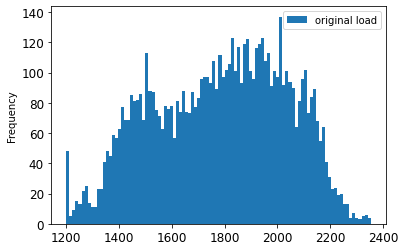

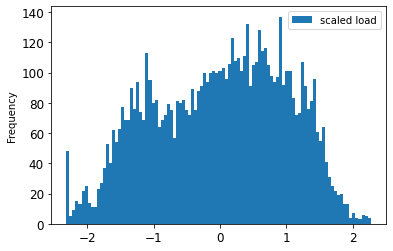

In [9]:
stlf_data[stlf_data.index <= 6816][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
train[train.index <= 6816][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

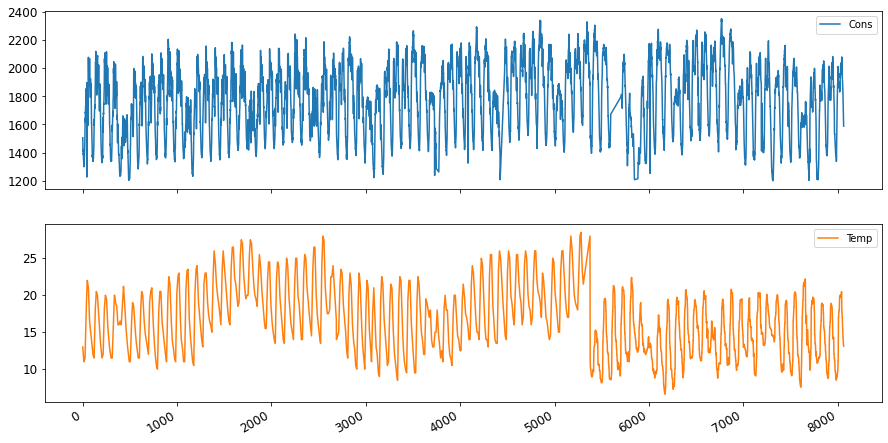

In [10]:
import matplotlib.pyplot as plt
stlf_data.plot(y=['Cons', 'Temp'], subplots=True, figsize=(15, 8), fontsize=12)
plt.show()

In [11]:
train_shifted = train.copy()
train_shifted=train_shifted.astype(np.float64)
train_shifted['y_t+100'] = train_shifted['Cons'].shift(-100)
train_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
0,-1.106131,-0.937848,1.071355,-1.660867,-0.014303,0.670218,-0.610396,0.123904,0.224613,-1.082382,-1.523442,-0.823597,-0.373055,-1.409063
1,-1.249625,-0.974197,1.094306,-1.660867,-0.014303,0.670218,-0.809639,-0.107273,0.208663,-1.307053,-1.630921,-0.997397,-0.501139,-1.524655
2,-1.277526,-1.010546,1.117257,-1.660867,-0.014303,0.670218,-0.897306,-0.278664,0.316330,-1.242861,-1.814034,-1.044797,-0.641153,-1.652205
3,-1.492768,-1.046896,1.140209,-1.660867,-0.014303,0.670218,-0.969034,-0.477954,0.376145,-1.315077,-1.786169,-1.107997,-0.805380,-1.588430
4,-1.456894,-1.083245,1.163160,-1.516422,-0.014303,0.670218,-1.104519,-0.609486,0.124922,-1.359208,-1.833937,-1.242297,-0.944341,-1.624304
5,-1.572486,-1.119594,1.186112,-1.516422,-0.014303,0.670218,-1.247974,-0.808777,-0.106363,-1.555795,-1.957339,-1.376597,-1.073126,-1.672135
6,-1.552557,-1.155943,1.209063,-1.516422,-0.014303,0.670218,-1.275868,-0.896465,-0.277832,-1.628011,-2.032973,-1.412147,-1.185067,-1.640248
7,-1.632276,-1.192293,1.232014,-1.516422,-0.014303,0.670218,-1.491050,-0.968209,-0.477216,-1.708250,-2.092683,-1.447697,-1.286481,-1.660177
8,-1.743882,-1.228642,1.254966,-1.371978,-0.014303,0.670218,-1.455187,-1.103727,-0.608808,-1.712262,-2.140452,-1.585946,-1.386140,-1.723952
9,-1.751854,-1.264991,1.277917,-1.371978,-0.014303,0.670218,-1.570747,-1.247217,-0.808192,-1.704238,-2.128510,-1.585946,-1.468955,-1.775770


In [12]:
for t in range(1, T+1):
    train_shifted['Cons_t-'+str(T-t)] = train_shifted['Cons'].shift(T-t)
train_shifted = train_shifted.rename(columns={'Cons':'Cons_original'})
train_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
0,-1.106131,-0.937848,1.071355,-1.660867,-0.014303,0.670218,-0.610396,0.123904,0.224613,-1.082382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.106131
1,-1.249625,-0.974197,1.094306,-1.660867,-0.014303,0.670218,-0.809639,-0.107273,0.208663,-1.307053,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.106131,-1.249625
2,-1.277526,-1.010546,1.117257,-1.660867,-0.014303,0.670218,-0.897306,-0.278664,0.316330,-1.242861,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.106131,-1.249625,-1.277526
3,-1.492768,-1.046896,1.140209,-1.660867,-0.014303,0.670218,-0.969034,-0.477954,0.376145,-1.315077,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.106131,-1.249625,-1.277526,-1.492768
4,-1.456894,-1.083245,1.163160,-1.516422,-0.014303,0.670218,-1.104519,-0.609486,0.124922,-1.359208,...,NaN,NaN,NaN,NaN,NaN,-1.106131,-1.249625,-1.277526,-1.492768,-1.456894
5,-1.572486,-1.119594,1.186112,-1.516422,-0.014303,0.670218,-1.247974,-0.808777,-0.106363,-1.555795,...,NaN,NaN,NaN,NaN,-1.106131,-1.249625,-1.277526,-1.492768,-1.456894,-1.572486
6,-1.552557,-1.155943,1.209063,-1.516422,-0.014303,0.670218,-1.275868,-0.896465,-0.277832,-1.628011,...,NaN,NaN,NaN,-1.106131,-1.249625,-1.277526,-1.492768,-1.456894,-1.572486,-1.552557
7,-1.632276,-1.192293,1.232014,-1.516422,-0.014303,0.670218,-1.491050,-0.968209,-0.477216,-1.708250,...,NaN,NaN,-1.106131,-1.249625,-1.277526,-1.492768,-1.456894,-1.572486,-1.552557,-1.632276
8,-1.743882,-1.228642,1.254966,-1.371978,-0.014303,0.670218,-1.455187,-1.103727,-0.608808,-1.712262,...,NaN,-1.106131,-1.249625,-1.277526,-1.492768,-1.456894,-1.572486,-1.552557,-1.632276,-1.743882
9,-1.751854,-1.264991,1.277917,-1.371978,-0.014303,0.670218,-1.570747,-1.247217,-0.808192,-1.704238,...,-1.106131,-1.249625,-1.277526,-1.492768,-1.456894,-1.572486,-1.552557,-1.632276,-1.743882,-1.751854


In [13]:
train_shifted = train_shifted.dropna(how='any')
train_shifted.head(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
10,-1.727938,-1.301340,1.300869,-1.371978,-0.014303,0.670218,-1.550823,-1.275117,-0.895920,-1.676155,...,-1.249625,-1.277526,-1.492768,-1.456894,-1.572486,-1.552557,-1.632276,-1.743882,-1.751854,-1.727938
11,-1.747868,-1.337690,1.323820,-1.371978,-0.014303,0.670218,-1.630520,-1.490351,-0.967698,-1.740346,...,-1.277526,-1.492768,-1.456894,-1.572486,-1.552557,-1.632276,-1.743882,-1.751854,-1.727938,-1.747868
12,-1.871432,-1.374039,1.346771,-1.227534,-0.014303,0.670218,-1.742096,-1.454479,-1.103279,-1.768430,...,-1.492768,-1.456894,-1.572486,-1.552557,-1.632276,-1.743882,-1.751854,-1.727938,-1.747868,-1.871432
13,-1.927236,-1.364952,1.346771,-1.227534,-0.014303,0.670218,-1.750066,-1.570068,-1.246835,-1.736334,...,-1.456894,-1.572486,-1.552557,-1.632276,-1.743882,-1.751854,-1.727938,-1.747868,-1.871432,-1.927236
14,-1.803671,-1.355864,1.346771,-1.227534,-0.014303,0.670218,-1.726157,-1.550138,-1.274748,-1.816574,...,-1.572486,-1.552557,-1.632276,-1.743882,-1.751854,-1.727938,-1.747868,-1.871432,-1.927236,-1.803671


In [14]:
train_shifted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6707 entries, 10 to 6716
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Cons_original  6707 non-null   float64
 1   Temp           6707 non-null   float64
 2   Hum            6707 non-null   float64
 3   A              6707 non-null   float64
 4   B              6707 non-null   float64
 5   C              6707 non-null   float64
 6   D              6707 non-null   float64
 7   E              6707 non-null   float64
 8   F              6707 non-null   float64
 9   G              6707 non-null   float64
 10  H              6707 non-null   float64
 11  I              6707 non-null   float64
 12  J              6707 non-null   float64
 13  y_t+100        6707 non-null   float64
 14  Cons_t-10      6707 non-null   float64
 15  Cons_t-9       6707 non-null   float64
 16  Cons_t-8       6707 non-null   float64
 17  Cons_t-7       6707 non-null   float64
 18  Cons_t-

In [15]:
y_train = train_shifted[['y_t+100']]
y_train


,y_t+100
10,-1.696051
11,-1.680107
12,-1.644233
13,-1.676121
14,-1.624304
...,...
6712,0.416500
6713,0.229161
6714,0.097625
6715,-0.037897


In [16]:
X_train = train_shifted[['Cons_original','Cons_t-0','Cons_t-1','Cons_t-2','Cons_t-3','Cons_t-4','Cons_t-5','Cons_t-6','Cons_t-7','Cons_t-8', 'Cons_t-9','Cons_t-10','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_train


,Cons_original,Cons_t-0,Cons_t-1,Cons_t-2,Cons_t-3,Cons_t-4,Cons_t-5,Cons_t-6,Cons_t-7,Cons_t-8,...,A,B,C,D,E,F,G,H,I,J
10,-1.727938,-1.727938,-1.751854,-1.743882,-1.632276,-1.552557,-1.572486,-1.456894,-1.492768,-1.277526,...,-1.371978,-0.014303,0.670218,-1.550823,-1.275117,-0.895920,-1.676155,-2.152394,-1.578046,-1.541945
11,-1.747868,-1.747868,-1.727938,-1.751854,-1.743882,-1.632276,-1.552557,-1.572486,-1.456894,-1.492768,...,-1.371978,-0.014303,0.670218,-1.630520,-1.490351,-0.967698,-1.740346,-2.128510,-1.660996,-1.610373
12,-1.871432,-1.871432,-1.747868,-1.727938,-1.751854,-1.743882,-1.632276,-1.552557,-1.572486,-1.456894,...,-1.227534,-0.014303,0.670218,-1.742096,-1.454479,-1.103279,-1.768430,-2.224047,-1.684696,-1.677748
13,-1.927236,-1.927236,-1.871432,-1.747868,-1.727938,-1.751854,-1.743882,-1.632276,-1.552557,-1.572486,...,-1.227534,-0.014303,0.670218,-1.750066,-1.570068,-1.246835,-1.736334,-2.283757,-1.712346,-1.737404
14,-1.803671,-1.803671,-1.927236,-1.871432,-1.747868,-1.727938,-1.751854,-1.743882,-1.632276,-1.552557,...,-1.227534,-0.014303,0.670218,-1.726157,-1.550138,-1.274748,-1.816574,-2.267834,-1.664946,-1.783724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6712,0.480275,0.480275,0.655657,0.803137,0.795165,0.779221,0.926701,0.990476,1.181802,1.301380,...,1.516910,0.485703,0.670218,0.780320,1.303705,1.600357,0.723008,0.128550,0.831451,1.084284
6713,0.340767,0.340767,0.480275,0.655657,0.803137,0.795165,0.779221,0.926701,0.990476,1.181802,...,1.516910,0.485703,0.670218,0.796259,1.184130,1.512629,0.530433,0.482833,0.653701,0.981467
6714,0.404542,0.404542,0.340767,0.480275,0.655657,0.803137,0.795165,0.779221,0.926701,0.990476,...,1.516910,0.485703,0.670218,0.804229,0.992811,1.476740,0.502349,0.622158,0.519401,0.887423
6715,0.265034,0.265034,0.404542,0.340767,0.480275,0.655657,0.803137,0.795165,0.779221,0.926701,...,1.516910,0.485703,0.670218,0.656789,0.929038,1.404962,0.337858,0.017091,0.337701,0.787412


In [17]:
X_train=np.atleast_3d(X_train)
X_train.shape

(6707, 24, 1)

In [18]:

#subsequences=2
#timesteps=X_train.shape[1]//subsequences
X_train=X_train.reshape(6707,2,1,12)
#print(X_train.shape)

In [19]:
valid = stlf_data.copy()[(stlf_data.index >=6817) & (stlf_data.index <=7777)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
valid


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
6817,1691.0,13.452452,91.725740,1.0,7.0,0.0,1840.0,1931.0,2015.0,1605.0,1657.0,1654.0,1869.833333
6818,1614.0,13.072452,92.619702,1.0,7.0,0.0,1807.0,1887.0,2021.0,1634.0,1648.0,1627.0,1835.916667
6819,1622.0,12.692452,93.513664,1.0,7.0,0.0,1773.0,1887.0,2002.0,1619.0,1625.0,1601.0,1804.250000
6820,1605.0,12.692452,93.513664,2.0,7.0,0.0,1721.0,1887.0,1991.0,1605.0,1606.0,1581.0,1772.083333
6821,1600.0,12.692452,93.513664,2.0,7.0,0.0,1691.0,1840.0,1931.0,1562.0,1591.0,1558.0,1744.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7773,1409.0,12.322452,84.199320,24.0,2.0,1.0,1671.0,1779.0,1813.0,1509.0,1659.0,1597.0,1677.083333
7774,1346.0,11.462452,84.199320,24.0,2.0,1.0,1645.0,1769.0,1805.0,1471.0,1621.0,1555.0,1638.833333
7775,1337.0,11.462452,88.158585,24.0,2.0,1.0,1589.0,1689.0,1778.0,1457.0,1599.0,1539.0,1602.083333
7776,1331.0,11.462452,88.158585,1.0,3.0,1.0,1538.0,1682.0,1771.0,1411.0,1529.0,1525.0,1565.416667


In [20]:
valid[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(valid)
valid.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
6817,-0.206997,-0.400218,0.905233,-1.658081,1.441195,-1.003127,0.383925,0.744973,1.075970,-0.640864,-0.566621,-0.632388,0.526059
6818,-0.515196,-0.506184,0.958572,-1.658081,1.441195,-1.003127,0.251071,0.567690,1.100092,-0.530108,-0.600850,-0.734412,0.383022
6819,-0.483175,-0.612151,1.011912,-1.658081,1.441195,-1.003127,0.114191,0.567690,1.023705,-0.587396,-0.688322,-0.832657,0.249474
6820,-0.551219,-0.612151,1.011912,-1.513750,1.441195,-1.003127,-0.095155,0.567690,0.979481,-0.640864,-0.760582,-0.908230,0.113818
6821,-0.571232,-0.612151,1.011912,-1.513750,1.441195,-1.003127,-0.215931,0.378321,0.738258,-0.805088,-0.817629,-0.995139,-0.002510
6822,-0.779367,-0.592631,0.997433,-1.513750,1.441195,-1.003127,-0.525924,0.245359,0.561361,-0.839460,-0.775794,-0.991361,-0.121649
6823,-0.667294,-0.573111,0.982954,-1.513750,1.441195,-1.003127,-0.493717,0.108368,0.561361,-0.835641,-0.878479,-0.968689,-0.230947
6824,-0.707320,-0.573111,0.982954,-1.369419,1.441195,-1.003127,-0.562157,-0.101148,0.561361,-0.892929,-0.893692,-1.066934,-0.343760
6825,-0.791374,-0.573111,0.982954,-1.369419,1.441195,-1.003127,-0.582287,-0.222022,0.372402,-0.965493,-0.931723,-1.134950,-0.447436
6826,-0.803382,-0.857548,1.108550,-1.369419,1.441195,-1.003127,-0.791633,-0.532267,0.239730,-1.007503,-1.011590,-1.184072,-0.540568


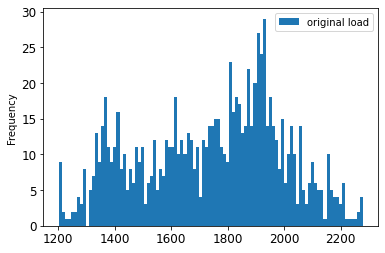

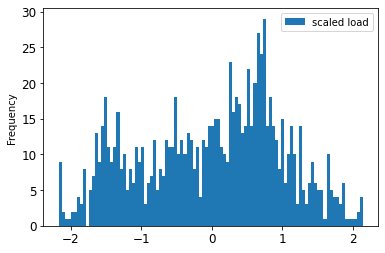

In [21]:
stlf_data[(stlf_data.index >=6817) & (stlf_data.index <=7777)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
valid[(valid.index >=6817) & (valid.index <=7777)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [22]:
valid_shifted = valid.copy()
valid_shifted=valid_shifted.astype(np.float64)
valid_shifted['y_t+100'] = valid_shifted['Cons'].shift(-100)
valid_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
6817,-0.206997,-0.400218,0.905233,-1.658081,1.441195,-1.003127,0.383925,0.744973,1.075970,-0.640864,-0.566621,-0.632388,0.526059,-0.587243
6818,-0.515196,-0.506184,0.958572,-1.658081,1.441195,-1.003127,0.251071,0.567690,1.100092,-0.530108,-0.600850,-0.734412,0.383022,-0.591245
6819,-0.483175,-0.612151,1.011912,-1.658081,1.441195,-1.003127,0.114191,0.567690,1.023705,-0.587396,-0.688322,-0.832657,0.249474,-0.647281
6820,-0.551219,-0.612151,1.011912,-1.513750,1.441195,-1.003127,-0.095155,0.567690,0.979481,-0.640864,-0.760582,-0.908230,0.113818,-0.839405
6821,-0.571232,-0.612151,1.011912,-1.513750,1.441195,-1.003127,-0.215931,0.378321,0.738258,-0.805088,-0.817629,-0.995139,-0.002510,-1.291697
6822,-0.779367,-0.592631,0.997433,-1.513750,1.441195,-1.003127,-0.525924,0.245359,0.561361,-0.839460,-0.775794,-0.991361,-0.121649,-1.047540
6823,-0.667294,-0.573111,0.982954,-1.513750,1.441195,-1.003127,-0.493717,0.108368,0.561361,-0.835641,-0.878479,-0.968689,-0.230947,-1.079560
6824,-0.707320,-0.573111,0.982954,-1.369419,1.441195,-1.003127,-0.562157,-0.101148,0.561361,-0.892929,-0.893692,-1.066934,-0.343760,-1.119586
6825,-0.791374,-0.573111,0.982954,-1.369419,1.441195,-1.003127,-0.582287,-0.222022,0.372402,-0.965493,-0.931723,-1.134950,-0.447436,-1.083563
6826,-0.803382,-0.857548,1.108550,-1.369419,1.441195,-1.003127,-0.791633,-0.532267,0.239730,-1.007503,-1.011590,-1.184072,-0.540568,-1.031529


In [23]:
for t in range(1, T+1):
    valid_shifted['Cons_t-'+str(T-t)] = valid_shifted['Cons'].shift(T-t)
valid_shifted = valid_shifted.rename(columns={'Cons':'Cons_original'})
valid_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
6817,-0.206997,-0.400218,0.905233,-1.658081,1.441195,-1.003127,0.383925,0.744973,1.075970,-0.640864,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.206997
6818,-0.515196,-0.506184,0.958572,-1.658081,1.441195,-1.003127,0.251071,0.567690,1.100092,-0.530108,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.206997,-0.515196
6819,-0.483175,-0.612151,1.011912,-1.658081,1.441195,-1.003127,0.114191,0.567690,1.023705,-0.587396,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.206997,-0.515196,-0.483175
6820,-0.551219,-0.612151,1.011912,-1.513750,1.441195,-1.003127,-0.095155,0.567690,0.979481,-0.640864,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.206997,-0.515196,-0.483175,-0.551219
6821,-0.571232,-0.612151,1.011912,-1.513750,1.441195,-1.003127,-0.215931,0.378321,0.738258,-0.805088,...,NaN,NaN,NaN,NaN,NaN,-0.206997,-0.515196,-0.483175,-0.551219,-0.571232
6822,-0.779367,-0.592631,0.997433,-1.513750,1.441195,-1.003127,-0.525924,0.245359,0.561361,-0.839460,...,NaN,NaN,NaN,NaN,-0.206997,-0.515196,-0.483175,-0.551219,-0.571232,-0.779367
6823,-0.667294,-0.573111,0.982954,-1.513750,1.441195,-1.003127,-0.493717,0.108368,0.561361,-0.835641,...,NaN,NaN,NaN,-0.206997,-0.515196,-0.483175,-0.551219,-0.571232,-0.779367,-0.667294
6824,-0.707320,-0.573111,0.982954,-1.369419,1.441195,-1.003127,-0.562157,-0.101148,0.561361,-0.892929,...,NaN,NaN,-0.206997,-0.515196,-0.483175,-0.551219,-0.571232,-0.779367,-0.667294,-0.707320
6825,-0.791374,-0.573111,0.982954,-1.369419,1.441195,-1.003127,-0.582287,-0.222022,0.372402,-0.965493,...,NaN,-0.206997,-0.515196,-0.483175,-0.551219,-0.571232,-0.779367,-0.667294,-0.707320,-0.791374
6826,-0.803382,-0.857548,1.108550,-1.369419,1.441195,-1.003127,-0.791633,-0.532267,0.239730,-1.007503,...,-0.206997,-0.515196,-0.483175,-0.551219,-0.571232,-0.779367,-0.667294,-0.707320,-0.791374,-0.803382


In [24]:
valid_shifted = valid_shifted.dropna(how='any')
valid_shifted.head(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
6827,-0.831400,-1.141985,1.234146,-1.369419,1.441195,-1.003127,-0.678908,-0.500033,0.103037,-1.080068,...,-0.515196,-0.483175,-0.551219,-0.571232,-0.779367,-0.667294,-0.707320,-0.791374,-0.803382,-0.831400
6828,-0.947475,-1.141985,1.234146,-1.225087,1.441195,-1.003127,-0.719167,-0.568529,-0.106024,-1.129717,...,-0.483175,-0.551219,-0.571232,-0.779367,-0.667294,-0.707320,-0.791374,-0.803382,-0.831400,-0.947475
6829,-0.967488,-1.141985,1.234146,-1.225087,1.441195,-1.003127,-0.803710,-0.588675,-0.226635,-1.141174,...,-0.551219,-0.571232,-0.779367,-0.667294,-0.707320,-0.791374,-0.803382,-0.831400,-0.947475,-0.967488
6830,-0.987501,-1.179631,1.251445,-1.225087,1.441195,-1.003127,-0.815788,-0.798190,-0.536205,-1.106802,...,-0.571232,-0.779367,-0.667294,-0.707320,-0.791374,-0.803382,-0.831400,-0.947475,-0.967488,-0.987501
6831,-0.963485,-1.217277,1.268744,-1.225087,1.441195,-1.003127,-0.843969,-0.685374,-0.504042,-1.133536,...,-0.779367,-0.667294,-0.707320,-0.791374,-0.803382,-0.831400,-0.947475,-0.967488,-0.987501,-0.963485


In [25]:
y_valid = valid_shifted[['y_t+100']]
y_valid


,y_t+100
6827,-1.111581
6828,-1.159612
6829,-1.091568
6830,-1.027527
6831,-1.075558
...,...
7673,-1.335726
7674,-1.587888
7675,-1.623911
7676,-1.647927


In [26]:
X_valid = valid_shifted[['Cons_original','Cons_t-0','Cons_t-1','Cons_t-2','Cons_t-3','Cons_t-4','Cons_t-5','Cons_t-6','Cons_t-7','Cons_t-8', 'Cons_t-9','Cons_t-10','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_valid


,Cons_original,Cons_t-0,Cons_t-1,Cons_t-2,Cons_t-3,Cons_t-4,Cons_t-5,Cons_t-6,Cons_t-7,Cons_t-8,...,A,B,C,D,E,F,G,H,I,J
6827,-0.831400,-0.831400,-0.803382,-0.791374,-0.707320,-0.667294,-0.779367,-0.571232,-0.551219,-0.483175,...,-1.369419,1.441195,-1.003127,-0.678908,-0.500033,0.103037,-1.080068,-1.015393,-1.153843,-0.624211
6828,-0.947475,-0.947475,-0.831400,-0.803382,-0.791374,-0.707320,-0.667294,-0.779367,-0.571232,-0.551219,...,-1.225087,1.441195,-1.003127,-0.719167,-0.568529,-0.106024,-1.129717,-1.042015,-1.142507,-0.699771
6829,-0.967488,-0.967488,-0.947475,-0.831400,-0.803382,-0.791374,-0.707320,-0.667294,-0.779367,-0.571232,...,-1.225087,1.441195,-1.003127,-0.803710,-0.588675,-0.226635,-1.141174,-1.068637,-1.267203,-0.766545
6830,-0.987501,-0.987501,-0.967488,-0.947475,-0.831400,-0.803382,-0.791374,-0.707320,-0.667294,-0.779367,...,-1.225087,1.441195,-1.003127,-0.815788,-0.798190,-0.536205,-1.106802,-1.076243,-1.195408,-0.808015
6831,-0.963485,-0.963485,-0.987501,-0.967488,-0.947475,-0.831400,-0.803382,-0.791374,-0.707320,-0.667294,...,-1.225087,1.441195,-1.003127,-0.843969,-0.685374,-0.504042,-1.133536,-1.099062,-1.165179,-0.850188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7673,-0.511194,-0.511194,-0.439147,-0.343085,-0.315067,-0.327075,-0.335080,-0.363098,-0.259031,-0.134951,...,1.517204,-1.256834,-1.003127,-0.336708,-0.149498,-0.057779,-0.064171,-0.429708,-0.511471,-0.275580
7674,-0.531206,-0.531206,-0.511194,-0.439147,-0.343085,-0.315067,-0.327075,-0.335080,-0.363098,-0.259031,...,1.517204,-1.256834,-1.003127,-0.324630,-0.274401,0.026649,-0.102362,-0.425905,-0.549258,-0.326188
7675,-0.675299,-0.675299,-0.531206,-0.511194,-0.439147,-0.343085,-0.315067,-0.327075,-0.335080,-0.363098,...,1.517204,-1.256834,-1.003127,-0.352811,-0.379159,-0.001494,-0.174926,-0.528590,-0.598380,-0.386988
7676,-0.811387,-0.811387,-0.675299,-0.531206,-0.511194,-0.439147,-0.343085,-0.315067,-0.327075,-0.335080,...,1.661535,-1.256834,-1.003127,-0.449433,-0.350955,-0.077881,-0.304778,-0.631275,-0.738191,-0.453059


In [27]:
X_valid=np.atleast_3d(X_valid)
X_valid.shape

(851, 24, 1)

In [28]:
#subsequences=2
#X_valid=X_valid.shape[1]//subsequences
X_valid=X_valid.reshape(851,2,1,12)
print(X_valid.shape)

(851, 2, 1, 12)


In [29]:
#from keras.layers import RepeatVector
from keras.layers import BatchNormalization
from keras.layers import Input

model = models.Sequential()
model.add(TimeDistributed(Conv1D(filters=128, kernel_size=1, activation='relu'),input_shape=(None,1,12)))
#model.add(TimeDistributed(MaxPooling1D(pool_size=1,strides=1, padding='valid')))
#model.add(TimeDistributed(MaxPooling1D(pool_size=1,strides=1, padding='valid')))
#model.add(Dropout(0.1))
model.add(TimeDistributed(Conv1D(filters=128, kernel_size=1, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(pool_size=1,strides=1, padding='valid')))
#model.add(Dropout(0.1))
#model.add(TimeDistributed(MaxPooling1D(pool_size=2,strides=1, padding='valid')))
#model.add(Dropout(0.1))
model.add(TimeDistributed(Flatten()))
#model.add(RepeatVector(5629))
model.add((LSTM(64,activation='linear')))
#model.add(Flatten())
#model.add(GRU(300))
#model.add(Dense(150,activation='linear'))
#model.add(Dense(75,activation='linear'))
#model.add(Dropout(0.1))
#model.add(Bidirectional(LSTM(300)))
model.add(Dense(1,activation='linear'))

In [30]:
from keras import optimizers
sgd = optimizers.Adam(lr=0.0001)
model.compile(sgd, loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, None, 1, 128)      1664      
_________________________________________________________________
time_distributed_1 (TimeDist (None, None, 1, 128)      16512     
_________________________________________________________________
time_distributed_2 (TimeDist (None, None, 1, 128)      0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, None, 128)         0         
_________________________________________________________________
lstm (LSTM)                  (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 67,649
Trainable params: 67,649
Non-trainable params: 0
____________________________________________________

In [31]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

In [32]:

history = model.fit(X_train,
          y_train,
          batch_size=250,
          epochs=300,verbose=1,
          validation_data=(X_valid, y_valid),
          callbacks=[earlystop],
          )


Epoch 1/300
27/27 [==============================] - 1s 42ms/step - loss: 0.8430 - val_loss: 0.6786
Epoch 2/300
27/27 [==============================] - 0s 15ms/step - loss: 0.6518 - val_loss: 0.5727
Epoch 3/300
27/27 [==============================] - 0s 16ms/step - loss: 0.5665 - val_loss: 0.5446
Epoch 4/300
27/27 [==============================] - 0s 12ms/step - loss: 0.5089 - val_loss: 0.4746
Epoch 5/300
27/27 [==============================] - 0s 17ms/step - loss: 0.4493 - val_loss: 0.4166
Epoch 6/300
27/27 [==============================] - 0s 18ms/step - loss: 0.3954 - val_loss: 0.3511
Epoch 7/300
27/27 [==============================] - 0s 14ms/step - loss: 0.3583 - val_loss: 0.3206
Epoch 8/300
27/27 [==============================] - 0s 13ms/step - loss: 0.3356 - val_loss: 0.2958
Epoch 9/300
27/27 [==============================] - 1s 20ms/step - loss: 0.3207 - val_loss: 0.2793
Epoch 10/300
27/27 [==============================] - 0s 12ms/step - loss: 0.3092 - val_loss: 0.2653

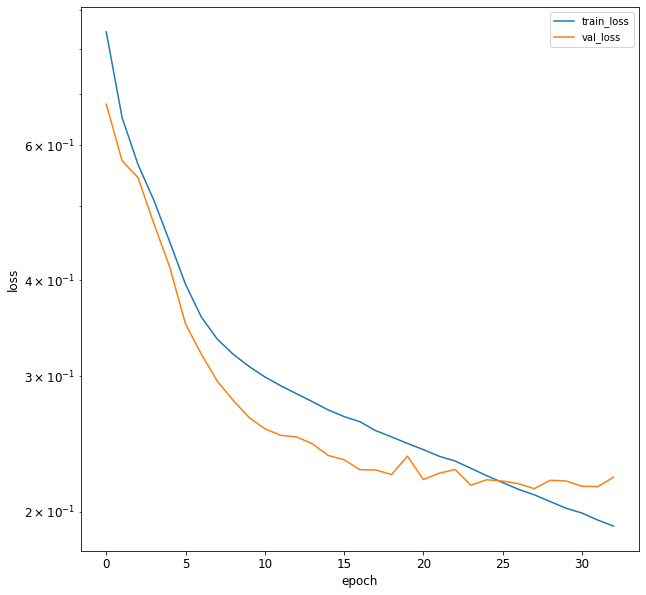

In [33]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss'], 'val_loss':history.history['val_loss']})
plot_df.plot(logy=True, figsize=(10,10), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()



In [34]:
test = stlf_data.copy()[(stlf_data.index >= 7778) & (stlf_data.index <=7989)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
test.head(20)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
7778,1266.0,11.157452,90.256377,1.0,3.0,1.0,1346.0,1645.0,1769.0,1386.0,1498.0,1475.0,1482.083333
7779,1251.0,10.852452,92.354170,1.0,3.0,1.0,1337.0,1589.0,1689.0,1371.0,1480.0,1451.0,1445.583333
7780,1210.0,10.852452,92.354170,2.0,3.0,1.0,1331.0,1538.0,1682.0,1350.0,1436.0,1430.0,1406.250000
7781,1230.0,10.852452,92.354170,2.0,3.0,1.0,1282.0,1409.0,1671.0,1333.0,1445.0,1411.0,1369.500000
7782,1247.0,10.827452,92.414655,2.0,3.0,1.0,1266.0,1346.0,1645.0,1333.0,1445.0,1402.0,1336.333333
7783,1237.0,10.802452,92.475140,2.0,3.0,1.0,1251.0,1337.0,1589.0,1336.0,1423.0,1391.0,1307.000000
7784,1243.0,10.802452,92.475140,3.0,3.0,1.0,1210.0,1331.0,1538.0,1319.0,1422.0,1378.0,1282.416667
7785,1244.0,10.802452,92.475140,3.0,3.0,1.0,1230.0,1282.0,1409.0,1298.0,1409.0,1377.0,1268.666667
7786,1226.0,10.872452,92.077738,3.0,3.0,1.0,1247.0,1266.0,1346.0,1298.0,1395.0,1370.0,1258.666667
7787,1226.0,10.942452,91.680336,3.0,3.0,1.0,1237.0,1251.0,1337.0,1276.0,1389.0,1352.0,1249.416667


In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
test[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(test)
test.head(10)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 7778 to 7989
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cons    212 non-null    float64
 1   Temp    212 non-null    float64
 2   Hum     212 non-null    float64
 3   A       212 non-null    float64
 4   B       212 non-null    float64
 5   C       212 non-null    float64
 6   D       212 non-null    float64
 7   E       212 non-null    float64
 8   F       212 non-null    float64
 9   G       212 non-null    float64
 10  H       212 non-null    float64
 11  I       212 non-null    float64
 12  J       212 non-null    float64
dtypes: float64(13)
memory usage: 23.2 KB


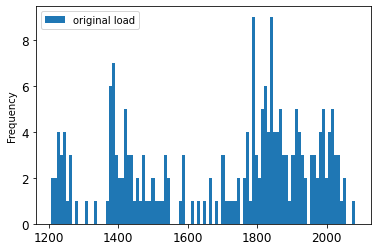

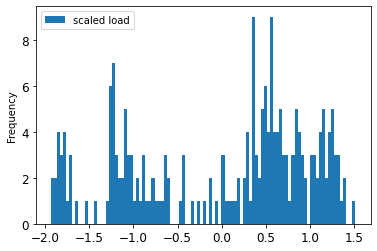

In [36]:
stlf_data[(stlf_data.index >= 7778) & (stlf_data.index <=7989)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
test[(test.index >=7778) & (test.index <= 7989)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [37]:
test_shifted = test.copy()
test_shifted=test_shifted.astype(np.float64)
test_shifted['y_t+100'] = test_shifted['Cons'].shift(-100)
test_shifted.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
7778,-1.695814,-0.689298,0.964391,-1.498364,-1.004934,0.0,-1.365295,-0.214680,0.253435,-1.046706,-0.414813,-0.733959,-0.887962,-1.004984
7779,-1.754692,-0.779463,1.098770,-1.498364,-1.004934,0.0,-1.400353,-0.434991,-0.065865,-1.105681,-0.500123,-0.840385,-1.037618,-1.075637
7780,-1.915624,-0.779463,1.098770,-1.357685,-1.004934,0.0,-1.423724,-0.635632,-0.093804,-1.188246,-0.708659,-0.933507,-1.198891,-1.087412
7781,-1.837121,-0.779463,1.098770,-1.357685,-1.004934,0.0,-1.614594,-1.143136,-0.137708,-1.255083,-0.666004,-1.017761,-1.349572,-1.181617
7782,-1.770393,-0.786853,1.102645,-1.357685,-1.004934,0.0,-1.676919,-1.390987,-0.241481,-1.255083,-0.666004,-1.057671,-1.485561,-1.220868
7783,-1.809645,-0.794244,1.106519,-1.357685,-1.004934,0.0,-1.735349,-1.426394,-0.464991,-1.243289,-0.770271,-1.106450,-1.605832,-1.240494
7784,-1.786094,-0.794244,1.106519,-1.217006,-1.004934,0.0,-1.895056,-1.449999,-0.668545,-1.310126,-0.775011,-1.164097,-1.706628,-1.260120
7785,-1.782168,-0.794244,1.106519,-1.217006,-1.004934,0.0,-1.817150,-1.642772,-1.183417,-1.392691,-0.836624,-1.168532,-1.763005,-1.256195
7786,-1.852821,-0.773550,1.081063,-1.217006,-1.004934,0.0,-1.750930,-1.705718,-1.434867,-1.392691,-0.902976,-1.199572,-1.804007,-1.256195
7787,-1.852821,-0.752857,1.055606,-1.217006,-1.004934,0.0,-1.789883,-1.764730,-1.470788,-1.479187,-0.931412,-1.279392,-1.841933,-1.236569


In [38]:
for t in range(1, T+1):
    test_shifted['Cons_t-'+str(T-t)] = test_shifted['Cons'].shift(T-t)
test_shifted = test_shifted.rename(columns={'Cons':'Cons_original'})
test_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
7778,-1.695814,-0.689298,0.964391,-1.498364,-1.004934,0.0,-1.365295,-0.214680,0.253435,-1.046706,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.695814
7779,-1.754692,-0.779463,1.098770,-1.498364,-1.004934,0.0,-1.400353,-0.434991,-0.065865,-1.105681,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.695814,-1.754692
7780,-1.915624,-0.779463,1.098770,-1.357685,-1.004934,0.0,-1.423724,-0.635632,-0.093804,-1.188246,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.695814,-1.754692,-1.915624
7781,-1.837121,-0.779463,1.098770,-1.357685,-1.004934,0.0,-1.614594,-1.143136,-0.137708,-1.255083,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.695814,-1.754692,-1.915624,-1.837121
7782,-1.770393,-0.786853,1.102645,-1.357685,-1.004934,0.0,-1.676919,-1.390987,-0.241481,-1.255083,...,NaN,NaN,NaN,NaN,NaN,-1.695814,-1.754692,-1.915624,-1.837121,-1.770393
7783,-1.809645,-0.794244,1.106519,-1.357685,-1.004934,0.0,-1.735349,-1.426394,-0.464991,-1.243289,...,NaN,NaN,NaN,NaN,-1.695814,-1.754692,-1.915624,-1.837121,-1.770393,-1.809645
7784,-1.786094,-0.794244,1.106519,-1.217006,-1.004934,0.0,-1.895056,-1.449999,-0.668545,-1.310126,...,NaN,NaN,NaN,-1.695814,-1.754692,-1.915624,-1.837121,-1.770393,-1.809645,-1.786094
7785,-1.782168,-0.794244,1.106519,-1.217006,-1.004934,0.0,-1.817150,-1.642772,-1.183417,-1.392691,...,NaN,NaN,-1.695814,-1.754692,-1.915624,-1.837121,-1.770393,-1.809645,-1.786094,-1.782168
7786,-1.852821,-0.773550,1.081063,-1.217006,-1.004934,0.0,-1.750930,-1.705718,-1.434867,-1.392691,...,NaN,-1.695814,-1.754692,-1.915624,-1.837121,-1.770393,-1.809645,-1.786094,-1.782168,-1.852821
7787,-1.852821,-0.752857,1.055606,-1.217006,-1.004934,0.0,-1.789883,-1.764730,-1.470788,-1.479187,...,-1.695814,-1.754692,-1.915624,-1.837121,-1.770393,-1.809645,-1.786094,-1.782168,-1.852821,-1.852821


In [39]:
test_shifted = test_shifted.dropna(how='any')
test_shifted.head(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
7788,-1.892073,-0.752857,1.055606,-1.076327,-1.004934,0.0,-1.766511,-1.926030,-1.494736,-1.479187,...,-1.754692,-1.915624,-1.837121,-1.770393,-1.809645,-1.786094,-1.782168,-1.852821,-1.852821,-1.892073
7789,-1.931325,-0.752857,1.055606,-1.076327,-1.004934,0.0,-1.762616,-1.847347,-1.690307,-1.467392,...,-1.915624,-1.837121,-1.770393,-1.809645,-1.786094,-1.782168,-1.852821,-1.852821,-1.892073,-1.931325
7790,-1.848896,-0.726251,0.993562,-1.076327,-1.004934,0.0,-1.832731,-1.780467,-1.754167,-1.770128,...,-1.837121,-1.770393,-1.809645,-1.786094,-1.782168,-1.852821,-1.852821,-1.892073,-1.931325,-1.848896
7791,-1.817495,-0.699645,0.931517,-1.076327,-1.004934,0.0,-1.832731,-1.819808,-1.814036,-1.490982,...,-1.770393,-1.809645,-1.786094,-1.782168,-1.852821,-1.852821,-1.892073,-1.931325,-1.848896,-1.817495
7792,-1.872447,-0.699645,0.931517,-0.935648,-1.004934,0.0,-1.871684,-1.796203,-1.977678,-1.439871,...,-1.809645,-1.786094,-1.782168,-1.852821,-1.852821,-1.892073,-1.931325,-1.848896,-1.817495,-1.872447


In [40]:
y_test = test_shifted[['y_t+100']]
y_test

,y_t+100
7788,-1.236569
7789,-1.173766
7790,-1.134514
7791,-1.052086
7792,-1.016759
...,...
7885,-1.209093
7886,-1.417127
7887,-1.138440
7888,-1.083487


In [41]:
X_test = test_shifted[['Cons_original','Cons_t-0','Cons_t-1','Cons_t-2','Cons_t-3','Cons_t-4','Cons_t-5','Cons_t-6','Cons_t-7','Cons_t-8', 'Cons_t-9','Cons_t-10','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_test

,Cons_original,Cons_t-0,Cons_t-1,Cons_t-2,Cons_t-3,Cons_t-4,Cons_t-5,Cons_t-6,Cons_t-7,Cons_t-8,...,A,B,C,D,E,F,G,H,I,J
7788,-1.892073,-1.892073,-1.852821,-1.852821,-1.782168,-1.786094,-1.809645,-1.770393,-1.837121,-1.915624,...,-1.076327,-1.004934,0.0,-1.766511,-1.926030,-1.494736,-1.479187,-1.059377,-1.314867,-1.881227
7789,-1.931325,-1.931325,-1.892073,-1.852821,-1.852821,-1.782168,-1.786094,-1.809645,-1.770393,-1.837121,...,-1.076327,-1.004934,0.0,-1.762616,-1.847347,-1.690307,-1.467392,-1.002504,-1.368080,-1.907194
7790,-1.848896,-1.848896,-1.931325,-1.892073,-1.852821,-1.852821,-1.782168,-1.786094,-1.809645,-1.770393,...,-1.076327,-1.004934,0.0,-1.832731,-1.780467,-1.754167,-1.770128,-1.007244,-1.372515,-1.920520
7791,-1.817495,-1.817495,-1.848896,-1.931325,-1.892073,-1.852821,-1.852821,-1.782168,-1.786094,-1.809645,...,-1.076327,-1.004934,0.0,-1.832731,-1.819808,-1.814036,-1.490982,-1.021462,-1.314867,-1.925987
7792,-1.872447,-1.872447,-1.817495,-1.848896,-1.931325,-1.892073,-1.852821,-1.852821,-1.782168,-1.786094,...,-0.935648,-1.004934,0.0,-1.871684,-1.796203,-1.977678,-1.439871,-1.049899,-1.337039,-1.922228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7885,-1.256195,-1.256195,-1.260120,-1.240494,-1.220868,-1.181617,-1.087412,-1.075637,-1.004984,-0.965732,...,-1.076327,0.516823,0.0,-1.166634,-0.973968,-0.828195,-1.754402,-1.452751,-1.181835,-1.132947
7886,-1.256195,-1.256195,-1.256195,-1.260120,-1.240494,-1.220868,-1.181617,-1.087412,-1.075637,-1.004984,...,-1.076327,0.516823,0.0,-1.205587,-1.013310,-0.844160,-1.671837,-1.817688,-1.186269,-1.172582
7887,-1.236569,-1.236569,-1.256195,-1.256195,-1.260120,-1.240494,-1.220868,-1.181617,-1.087412,-1.075637,...,-1.076327,0.516823,0.0,-1.225064,-1.084124,-0.939951,-1.640384,-1.481188,-1.199572,-1.202308
7888,-1.236569,-1.236569,-1.236569,-1.256195,-1.256195,-1.260120,-1.240494,-1.220868,-1.181617,-1.087412,...,-0.935648,0.516823,0.0,-1.244540,-1.095927,-1.043723,-1.695427,-1.419575,-1.226179,-1.223151


In [42]:
X_test=np.atleast_3d(X_test)
X_test.shape

(102, 24, 1)

In [43]:
X_test=np.atleast_3d(X_test)
X_test.shape

(102, 24, 1)

In [44]:
#subsequences=2
#X_test=X_test//subsequences
#X_test=X_test.reshape(1488,subsequences,12,1)
#print(X_test.shape)
X_test=X_test.reshape(102,2,1,12)

In [45]:
predictions = model.predict(X_test)
predictions

array([[-1.2049266 ],
       [-1.2093263 ],
       [-1.0879184 ],
       [-1.0370865 ],
       [-0.91735476],
       [-0.8807465 ],
       [-0.8557686 ],
       [-0.76756626],
       [-0.6572289 ],
       [-0.60031295],
       [-0.3698926 ],
       [-0.10660363],
       [ 0.20137154],
       [ 0.3835964 ],
       [ 0.45387843],
       [ 0.42182222],
       [ 0.44168606],
       [ 0.40110278],
       [ 0.34353244],
       [ 0.31570026],
       [ 0.31944335],
       [ 0.32227784],
       [ 0.52658176],
       [ 0.6958492 ],
       [ 0.7343782 ],
       [ 0.5959056 ],
       [ 0.64794624],
       [ 0.6531137 ],
       [ 0.45390344],
       [ 0.47309333],
       [ 0.50330895],
       [ 0.5270381 ],
       [ 0.5678575 ],
       [ 0.54709333],
       [ 0.5911728 ],
       [ 0.50732493],
       [ 0.6023216 ],
       [ 0.5762768 ],
       [ 0.5081675 ],
       [ 0.4656958 ],
       [ 0.48343343],
       [ 0.40351945],
       [ 0.42578843],
       [ 0.52543366],
       [ 0.52011603],
       [ 0

In [46]:
feature=stlf_data.copy()[(stlf_data.index >= 7778) & (stlf_data.index <=7989)][['Cons']]
#test_mean=cons.mean()
#test_mean
load_mean=feature.mean()
print(load_mean)
load_std=feature.std()
print(load_std)

Cons    1698.035377
dtype: float64
Cons    255.368705
dtype: float64


In [47]:
load_mean=1698.035377
load_std=255.368705
rescaled_target_load=(y_test*load_std)+load_mean
rescaled_target_load

,y_t+100
7788,1382.254352
7789,1398.292222
7790,1408.315891
7791,1429.365595
7792,1438.386897
...,...
7885,1389.270920
7886,1336.145476
7887,1407.313524
7888,1421.346660


In [48]:
rescaled_predicted_load=(predictions*load_std)+load_mean
rescaled_predicted_load

array([[1390.3348],
       [1389.2113],
       [1420.2151],
       [1433.196 ],
       [1463.7717],
       [1473.1204],
       [1479.4989],
       [1502.023 ],
       [1530.1997],
       [1544.7343],
       [1603.5764],
       [1670.8121],
       [1749.4594],
       [1795.9939],
       [1813.9418],
       [1805.7556],
       [1810.8282],
       [1800.4645],
       [1785.7628],
       [1778.6554],
       [1779.6112],
       [1780.3351],
       [1832.5079],
       [1875.7335],
       [1885.5726],
       [1850.211 ],
       [1863.5006],
       [1864.8202],
       [1813.9481],
       [1818.8486],
       [1826.5647],
       [1832.6244],
       [1843.0485],
       [1837.7458],
       [1849.0024],
       [1827.5903],
       [1851.8495],
       [1845.1985],
       [1827.8054],
       [1816.9595],
       [1821.4891],
       [1801.0817],
       [1806.7684],
       [1832.2147],
       [1830.8567],
       [1859.3956],
       [1869.3595],
       [1886.8729],
       [1897.9727],
       [1923.4077],


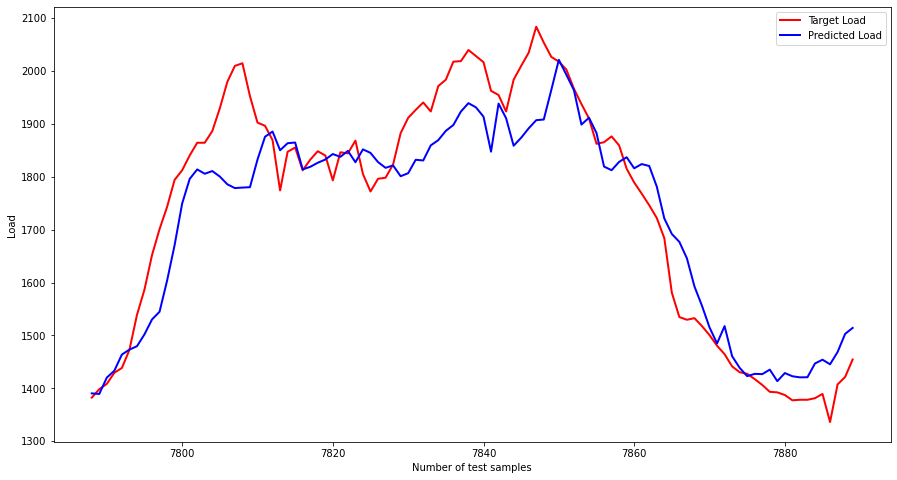

In [49]:
timestamp = y_test.index
plt.figure(figsize = (15,8))
plt.plot(timestamp,rescaled_target_load,label="Target Load",color='red', linestyle='solid',linewidth=2)

plt.plot(timestamp,rescaled_predicted_load,label="Predicted Load",color='blue', linestyle='solid',linewidth=2)

plt.xlabel('Number of test samples') 
plt.ylabel('Load') 
plt.legend()
plt.show()

In [50]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true),np.array(y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE=mean_absolute_percentage_error(rescaled_target_load, rescaled_predicted_load)
print(MAPE)

3.5197511710471305


In [51]:
MPE=np.mean((rescaled_target_load - rescaled_predicted_load) / rescaled_target_load) * 100
print(MPE)

y_t+100    1.012672
dtype: float64


In [52]:
PE=((rescaled_target_load - rescaled_predicted_load / rescaled_target_load)) * 100
APE=np.abs(PE)
print(APE)

            y_t+100
7788  138124.850635
7789  139729.871642
7790  140730.744158
7791  142836.291524
7792  143736.924875
...             ...
7885  138822.429190
7886  133506.376235
7887  140626.998859
7888  142028.933471
7889  145338.369781

[102 rows x 1 columns]


In [53]:
error = np.subtract(rescaled_target_load,rescaled_predicted_load)
sqerr=np.square(error)
print(sqerr)
MSE=sqerr.mean()
print(MSE)

           y_t+100
7788     65.294264
7789     82.463079
7790    141.590891
7791     14.672346
7792    644.389677
...            ...
7885   4196.382938
7886  11920.637540
7887   3753.755197
7888   6638.871053
7889   3567.879253

[102 rows x 1 columns]
y_t+100    6716.615278
dtype: float64


In [54]:
RMSE=MSE**0.5
print(RMSE)

y_t+100    81.954959
dtype: float64


In [55]:
a=np.array(rescaled_predicted_load)

In [56]:
for i in  range(0,102):
    b=a[i]
    print(b)

[1390.3348]
[1389.2113]
[1420.2151]
[1433.196]
[1463.7717]
[1473.1204]
[1479.4989]
[1502.023]
[1530.1997]
[1544.7343]
[1603.5764]
[1670.8121]
[1749.4594]
[1795.9939]
[1813.9418]
[1805.7556]
[1810.8282]
[1800.4645]
[1785.7628]
[1778.6554]
[1779.6112]
[1780.3351]
[1832.5079]
[1875.7335]
[1885.5726]
[1850.211]
[1863.5006]
[1864.8202]
[1813.9481]
[1818.8486]
[1826.5647]
[1832.6244]
[1843.0485]
[1837.7458]
[1849.0024]
[1827.5903]
[1851.8495]
[1845.1985]
[1827.8054]
[1816.9595]
[1821.4891]
[1801.0817]
[1806.7684]
[1832.2147]
[1830.8567]
[1859.3956]
[1869.3595]
[1886.8729]
[1897.9727]
[1923.4077]
[1939.2653]
[1931.2941]
[1913.7009]
[1847.5347]
[1938.4457]
[1910.7509]
[1858.7643]
[1873.9158]
[1891.7009]
[1907.0809]
[1908.3167]
[1964.2509]
[2021.2551]
[1992.9166]
[1964.0712]
[1898.7275]
[1911.7623]
[1882.7573]
[1819.3412]
[1812.4567]
[1828.1941]
[1836.9835]
[1816.0502]
[1824.0729]
[1820.384]
[1781.5116]
[1721.217]
[1691.8397]
[1676.833]
[1645.798]
[1592.6312]
[1555.9808]
[1515.1825]
[1484.748]
